In [1]:
# Import the libraries we'll use below.
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns  # for nicer plots
import tensorflow as tf

from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import metrics
from tensorflow import keras

sns.set(style="darkgrid")  # default style
tf.get_logger().setLevel('INFO')

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

2022-10-09 10:09:08.191398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-09 10:09:08.244064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 10:09:08.246883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 10:09:08.247010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [3]:
tf.config.list_physical_devices('GPU') 

2022-10-09 10:09:08.537570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 10:09:08.537691: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 10:09:08.537787: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

(28, 28, 3)

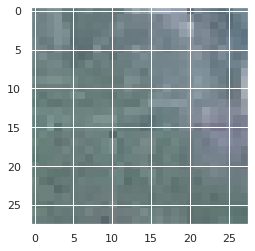

In [4]:
img = mpimg.imread('images/andesite/012L6.jpg')
plt.imshow(img)
img.shape

In [5]:
def build_model(n_classes,
                hidden_layer_sizes,
                act,
                opt,
                lr):
    """Build a multi-class logistic regression model using Keras.

    Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

    Returns:
    model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    model = keras.Sequential()
    model.add(keras.layers.Flatten())

    for hidden_layer_size in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(
            units = hidden_layer_size,
            activation = act))

    model.add(keras.layers.Dense(
      units=n_classes,
      activation = 'softmax'
    ))
    
    if opt == 'SGD':
        opt = tf.keras.optimizers.SGD(lr)
    elif opt == 'Adam':
        opt = tf.keras.optimizers.Adam(lr)
    else:
        raise NameError('You did not select an appropriate optimizer')

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer = opt,
                  metrics = ['accuracy'])

    return model

In [6]:
def train_and_evaluate(hidden_layer_sizes, activation, optimizer, learning_rate, num_epochs):

  # Build the model.
  model = build_model(n_classes,
                      hidden_layer_sizes,
                      activation,
                      optimizer,
                      learning_rate)

  # Train the model.
  print('Training...')
  history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation accuracy')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

In [16]:
image_generator = ImageDataGenerator(validation_split = 0.2, rescale=1.0/255.0)

In [17]:
(img_height, img_width) = (28, 28)
data_dir = 'images'
batch_size = 512
n_classes = 6

In [18]:
train_generator = image_generator.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True) # set as training data

validation_generator = image_generator.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True) # set as validation data

Found 23999 images belonging to 6 classes.
Found 5999 images belonging to 6 classes.


In [19]:
n_classes = 6

Training...
Epoch 1/20


/tmp/ipykernel_29681/945672944.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


46/46 [==============================] - 4s 81ms/step - loss: 1.3400 - accuracy: 0.5595 - val_loss: 1.0051 - val_accuracy: 0.7060
Epoch 2/20
46/46 [==============================] - 4s 78ms/step - loss: 0.8806 - accuracy: 0.7702 - val_loss: 0.7890 - val_accuracy: 0.8281
Epoch 3/20
46/46 [==============================] - 3s 72ms/step - loss: 0.7350 - accuracy: 0.8073 - val_loss: 0.6908 - val_accuracy: 0.8192
Epoch 4/20
46/46 [==============================] - 4s 77ms/step - loss: 0.6591 - accuracy: 0.8264 - val_loss: 0.6454 - val_accuracy: 0.8288
Epoch 5/20
46/46 [==============================] - 3s 75ms/step - loss: 0.6075 - accuracy: 0.8476 - val_loss: 0.5950 - val_accuracy: 0.8549
Epoch 6/20
46/46 [==============================] - 3s 75ms/step - loss: 0.5710 - accuracy: 0.8570 - val_loss: 0.5596 - val_accuracy: 0.8720
Epoch 7/20
46/46 [==============================] - 3s 75ms/step - loss: 0.5408 - accuracy: 0.8643 - val_loss: 0.5274 - val_accuracy: 0.8709
Epoch 8/20
46/46 [======

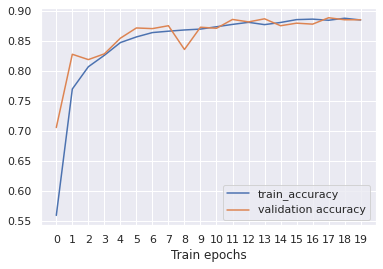

In [20]:
train_and_evaluate([1024], 'tanh', 'Adam', 0.00005, 20)